In [71]:
import plotly.express as px
import plotly
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from unet.unet import *

In [2]:
plotly.__version__
plotly.offline.init_notebook_mode(connected=True)

In [30]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [4]:
PATH_TO_MODEL = "checkpoints/detector_epoch_50.pth"
PATH_TO_TRAIN_LOSS = "checkpoints/1train_loss"
PATH_TO_VALIDATION_LOSS = "checkpoints/1validation_loss"

In [5]:
test_X = torch.load('data/testX')
test_Y = torch.load('data/testY')
test_X[:1].shape

torch.Size([1, 10, 39, 157, 157])

In [6]:
%%capture
model = UNet(10,2)
model.load_state_dict(torch.load(PATH_TO_MODEL))
model.eval()

In [7]:
%%time
with torch.no_grad():
    y_hat = model(test_X[:1])
    print(y_hat.shape)

torch.save(y_hat, "y_hat")

tensor([[[[[-2.7728e-01,  2.8043e-01,  1.1459e-02,  ...,  2.3171e-01,
            -4.5611e-02, -2.8472e-01],
           [-9.9300e-03,  2.5750e-01, -3.8983e-01,  ...,  5.5187e-03,
             4.7367e-01,  2.2756e-01],
           [ 7.5853e-01, -1.1017e+00, -6.2381e-01,  ..., -2.6853e-01,
             1.6003e-01,  3.9921e-01],
           ...,
           [ 2.8734e-01, -8.5699e-01, -5.0902e-01,  ...,  4.6620e-01,
             1.4480e-01,  5.0935e-01],
           [ 8.5949e-01,  3.0614e-01, -5.0154e-01,  ...,  5.0747e-01,
             5.5919e-01,  4.3897e-01],
           [-1.8589e-02, -1.7093e-01,  4.4383e-01,  ...,  4.8221e-01,
             1.8860e-01, -2.3221e-01]],

          [[-2.9175e-01, -5.3865e-02, -9.1121e-01,  ..., -9.0136e-03,
             2.0190e-01,  1.5857e-01],
           [-8.2203e-01, -5.1946e-01, -5.7538e-01,  ...,  4.5253e-01,
             7.2545e-01,  4.0488e-02],
           [-1.1426e+00, -1.9127e-02,  1.5787e-01,  ..., -1.1685e-01,
             3.2419e-01,  4.3124e-01],
 

In [32]:
losses = torch.load(PATH_TO_TRAIN_LOSS)
losses

tensor([12.2124, 11.4473, 11.2269, 11.0851, 10.9419, 10.7879, 10.6308, 10.4510,
        10.2576, 10.0192,  9.7141,  9.4101,  9.1895,  8.8194,  8.5073,  8.2453,
         8.0152,  7.8958,  7.7084,  7.5836,  7.4537,  7.3552,  7.3010,  7.2257,
         7.1407,  7.0807,  7.0281,  6.9911,  6.9535,  6.9174,  6.9273,  6.8826,
         6.8081,  6.7509,  6.7169,  6.6962,  6.6968,  6.6777,  6.6281,  6.5803,
         6.5513,  6.5299,  6.5160,  6.4954,  6.4753,  6.4762,  6.4624,  6.4201,
         6.3744,  6.3386])

In [33]:
losses_real = torch.load("checkpoints/train_loss")
losses_real

tensor([])

In [21]:
loss_fn = F.mse_loss
y = test_Y[:1]
y.shape

torch.Size([1, 2, 39, 157, 157])

In [38]:
sqr_y = (y_hat - y)**2
sqr_y.shape

torch.Size([1, 2, 39, 157, 157])

In [55]:
sqr_loss = torch.sum(sqr_y, 0, dtype=torch.float64)
sqr_loss.shape

torch.Size([2, 39, 157, 157])

In [57]:
mse_loss = torch.sum(sqr_loss, (1), dtype=torch.float64)
mse_loss.shape

torch.Size([2, 157, 157])

In [130]:
# Greyscale transform
to_gray = [transforms.Normalize((0.5,), (0.5,))]
to_gray = transforms.Compose(to_gray)

# Gaussian blurring
blur = [transforms.GaussianBlur(kernel_size=(7,13), sigma=0.2)]
blur = transforms.Compose(blur)

In [93]:
mse_loss1 = mse_loss[:1]
mse_pic1 = to_gray(mse_loss1)
mse_pic1.shape

torch.Size([1, 157, 157])

In [122]:
# plt.rcParams["figure.figsize"] = [6.4, 4.8]
# plt.rcParams["figure.autolayout"] = True

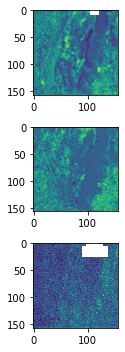

In [120]:
# fig, axarr = plt.subplots(3,1)
# fig.set_size_inches(10,5)
# axarr[0].imshow(y_hat[0,0,0], interpolation='bilinear', aspect='equal')
# axarr[1].imshow(y[0,0,0], interpolation='bilinear', aspect='equal')
# axarr[2].imshow(mse_pic1[0], interpolation='nearest', aspect='equal')
# plt.savefig("z0.png", dpi=1000)

## I can't get it to be high res in this cell

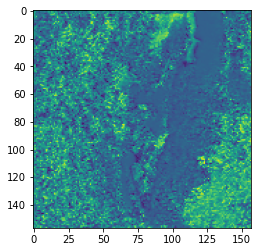

tensor([[ 0.6224,  0.9830,  1.1196,  ...,  0.0389,  0.1251,  0.4989],
        [-0.7719, -0.8584, -0.0799,  ...,  1.1772,  1.1887,  0.5704],
        [ 0.2395, -0.8935,  0.3914,  ...,  0.7448,  0.1220,  0.7310],
        ...,
        [ 0.5506, -0.4252,  0.3380,  ..., -0.4287, -0.7311, -0.5585],
        [ 0.6772,  0.0369, -0.3703,  ..., -0.1136, -0.5155, -0.4138],
        [-0.3499,  0.1295,  0.4148,  ..., -0.1924, -0.3607, -0.2683]])


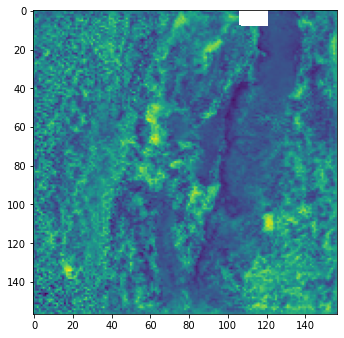

In [124]:
# Make high resolution images here:
fig = plt.imshow(y_hat[0,0,0])
plt.savefig("y_hat.png", dpi=500)

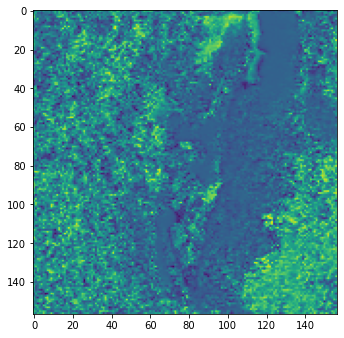

In [125]:
fig = plt.imshow(y[0,0,0])
plt.savefig("y.png", dpi=500)

TypeError: Invalid shape (1, 157, 157) for image data

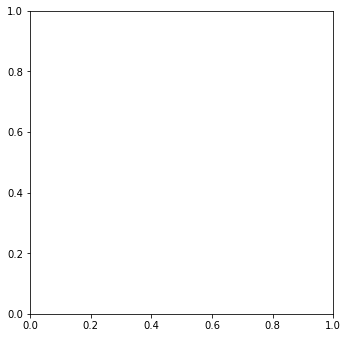

In [131]:
# Gaussian blurring on y
fig = plt.imshow(blur(y[:,0,0]))
plt.show()